In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./Datasets/Fake_Real_Data.csv",)
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9900 non-null   object
 1   label   9900 non-null   object
dtypes: object(2)
memory usage: 154.8+ KB


In [5]:
df.shape

(9900, 2)

In [6]:
df.nunique()

Text     9865
label       2
dtype: int64

In [7]:
df.label.unique()

array(['Fake', 'Real'], dtype=object)

In [8]:
df.describe()

,Text,label
count,9900,9900
unique,9865,2
top,Highlights: The Trump presidency on April 13 a...,Fake
freq,8,5000


In [10]:
df.columns

Index(['Text', 'label'], dtype='object')

In [16]:
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x184999781d0>,
 [Text(-1.1098602830837383, -0.01761113378759891, 'Fake'),
  Text(1.0998615434287093, 0.017452371948178037, 'Real')],
 [Text(-0.6099232186316037, -0.009678190640031833, '51%'),
  Text(0.5999244782338414, 0.00951947560809711, '49%')])

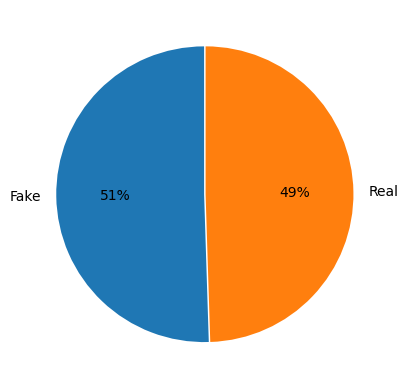

In [15]:
plt.pie(df.label.value_counts(), autopct= "%1.0f%%" , labels= [i for i in df.label.unique()], explode= (0.01,0) , startangle= 90)

In [17]:
df.label = df.label.map({
    "Real" : 1,
    "Fake" : 0
})

In [18]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0
1,U.S. conservative leader optimistic of common ...,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",1
3,Court Forces Ohio To Allow Millions Of Illega...,0
4,Democrats say Trump agrees to work on immigrat...,1


In [19]:
import spacy 
nlp = spacy.load("en_core_web_lg")

In [22]:
df["vector"] = df["Text"].apply(lambda x : nlp(x).vector)

In [32]:
df.head()

,Text,label,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,1,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",1,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,1,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."


In [42]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.vector.values,df.label,random_state= 5,test_size= .2)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_stacked = np.stack(x_train)
x_test_stacked = np.stack(x_test)

In [44]:
x_test_stacked

array([[-1.1919161 ,  1.2592913 , -2.5169466 , ..., -0.55093634,
        -3.3234975 ,  1.0641791 ],
       [-1.3189195 ,  0.6810172 , -2.241532  , ..., -0.68881875,
        -2.4068902 ,  1.2725967 ],
       [-1.6648091 ,  1.4955808 , -1.5535504 , ..., -1.2640367 ,
        -1.7271346 ,  0.89960307],
       ...,
       [-1.3158941 ,  1.1804514 , -2.525214  , ..., -0.42628756,
        -3.0261028 ,  1.2197464 ],
       [-1.7869072 ,  0.7969965 , -2.0969257 , ..., -0.3661983 ,
        -2.186038  ,  0.5395051 ],
       [-1.3883986 ,  0.9916706 , -2.0113604 , ..., -0.9060815 ,
        -2.8289433 ,  1.2329226 ]], dtype=float32)

In [45]:
x_train_stacked

array([[-1.5542021 ,  0.569788  , -1.9052098 , ..., -0.71532094,
        -1.6630324 ,  0.5711024 ],
       [-1.9378835 ,  0.8994711 , -2.0061002 , ..., -1.0422394 ,
        -2.1092222 ,  1.1207867 ],
       [-1.2976295 ,  0.50973755, -1.8420945 , ..., -0.6421041 ,
        -1.506199  ,  0.00850736],
       ...,
       [-2.1727834 ,  0.18144889, -1.8521459 , ..., -1.278239  ,
        -1.7170665 ,  0.47233692],
       [-1.5750451 ,  0.8386106 , -2.363929  , ..., -0.5146607 ,
        -1.0994514 ,  1.009156  ],
       [-2.160596  ,  0.50350434, -1.8329351 , ..., -1.4291503 ,
        -1.6527996 ,  0.8427072 ]], dtype=float32)

In [46]:
x_train_standardise = scaler.fit_transform(x_train_stacked)
x_test_standardise = scaler.transform(x_test_stacked)

In [47]:
x_test_stacked

array([[-1.1919161 ,  1.2592913 , -2.5169466 , ..., -0.55093634,
        -3.3234975 ,  1.0641791 ],
       [-1.3189195 ,  0.6810172 , -2.241532  , ..., -0.68881875,
        -2.4068902 ,  1.2725967 ],
       [-1.6648091 ,  1.4955808 , -1.5535504 , ..., -1.2640367 ,
        -1.7271346 ,  0.89960307],
       ...,
       [-1.3158941 ,  1.1804514 , -2.525214  , ..., -0.42628756,
        -3.0261028 ,  1.2197464 ],
       [-1.7869072 ,  0.7969965 , -2.0969257 , ..., -0.3661983 ,
        -2.186038  ,  0.5395051 ],
       [-1.3883986 ,  0.9916706 , -2.0113604 , ..., -0.9060815 ,
        -2.8289433 ,  1.2329226 ]], dtype=float32)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(metric= "euclidean", n_neighbors= 5)
model.fit(x_train_standardise, y_train)

KNeighborsClassifier(metric='euclidean')

In [51]:
y_pred = model.predict(x_test_standardise)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1001
           1       0.99      0.99      0.99       979

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980

